<a href="https://colab.research.google.com/github/VittorLeandro/ANALISE-DE-DADOS---ACIDENTES-PRF2024/blob/main/Avalia%C3%A7%C3%A3o_de_Qualidade_de_Atendimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== TESTE DO SISTEMA DE LÓGICA NEBULOSA ===

Caso 1: Atendimento rápido e muito cordial
  Tempo de espera: 8 minutos
  Cordialidade: 9/10
  Graus de pertinência:
    Excelente: 1.00
    Boa: 0.00
    Regular: 0.00
    Ruim: 0.00
  Qualidade final: 9.00/10

Caso 2: Atendimento médio
  Tempo de espera: 15 minutos
  Cordialidade: 6/10
  Graus de pertinência:
    Excelente: 0.00
    Boa: 0.50
    Regular: 0.50
    Ruim: 0.00
  Qualidade final: 6.00/10

Caso 3: Atendimento demorado e pouco cordial
  Tempo de espera: 35 minutos
  Cordialidade: 3/10
  Graus de pertinência:
    Excelente: 0.00
    Boa: 0.00
    Regular: 0.00
    Ruim: 1.00
  Qualidade final: 2.00/10

Caso 4: Bom atendimento geral
  Tempo de espera: 12 minutos
  Cordialidade: 8/10
  Graus de pertinência:
    Excelente: 0.80
    Boa: 0.20
    Regular: 0.00
    Ruim: 0.00
  Qualidade final: 8.60/10



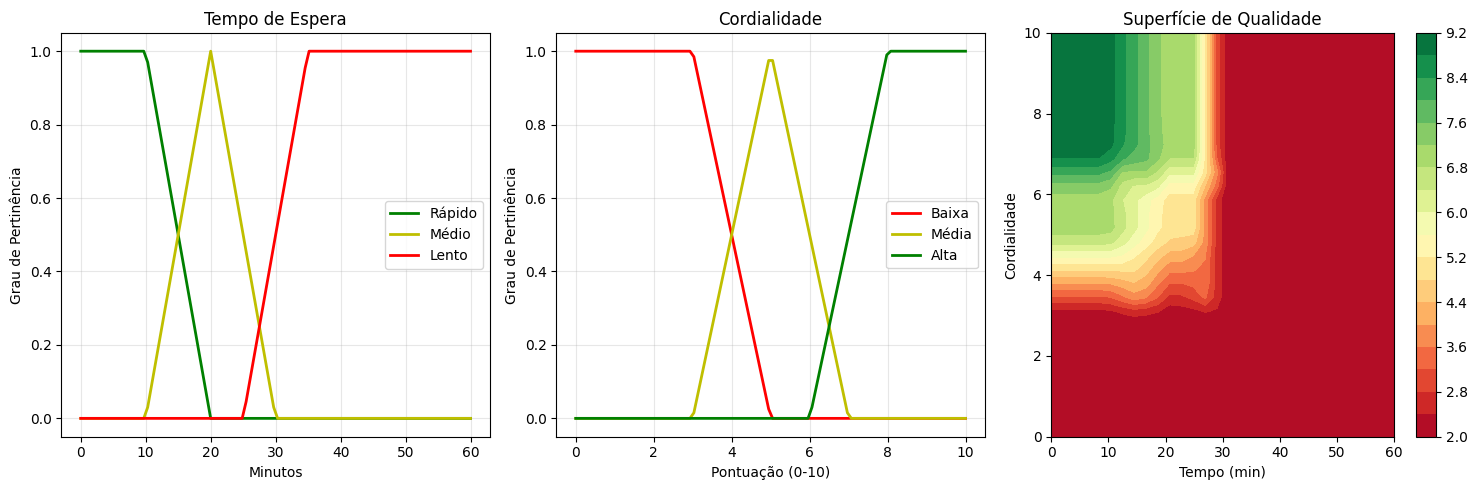

In [5]:
# Célula 1: Importar bibliotecas
import numpy as np
import matplotlib.pyplot as plt

# Configurar gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)

# Célula 2: Definir funções de pertinência para Tempo de Espera

def tempo_rapido(x):
    """Função de pertinência para tempo rápido (0-15 min)"""
    if x <= 10:
        return 1.0
    elif x <= 20:
        return (20 - x) / 10
    else:
        return 0.0

def tempo_medio(x):
    """Função de pertinência para tempo médio (10-30 min)"""
    if x <= 10:
        return 0.0
    elif x <= 20:
        return (x - 10) / 10
    elif x <= 30:
        return (30 - x) / 10
    else:
        return 0.0

def tempo_lento(x):
    """Função de pertinência para tempo lento (25-60 min)"""
    if x <= 25:
        return 0.0
    elif x <= 35:
        return (x - 25) / 10
    else:
        return 1.0
# Célula 3: Definir funções de pertinência para Cordialidade
def cordialidade_baixa(x):
    """Cordialidade baixa (0-4)"""
    if x <= 3:
        return 1.0
    elif x <= 5:
        return (5 - x) / 2
    else:
        return 0.0

def cordialidade_media(x):
    """Cordialidade média (3-7)"""
    if x <= 3:
        return 0.0
    elif x <= 5:
        return (x - 3) / 2
    elif x <= 7:
        return (7 - x) / 2
    else:
        return 0.0

def cordialidade_alta(x):
    """Cordialidade alta (6-10)"""
    if x <= 6:
        return 0.0
    elif x <= 8:
        return (x - 6) / 2
    else:
        return 1.0
# Célula 4: Definir regras do sistema fuzzy
def avaliar_atendimento(tempo, cordialidade):
    """
    Regras:
    1. Se tempo é rápido E cordialidade é alta → Qualidade EXCELENTE
    2. Se tempo é rápido E cordialidade é média → Qualidade BOA
    3. Se tempo é médio E cordialidade é alta → Qualidade BOA
    4. Se tempo é médio E cordialidade é média → Qualidade REGULAR
    5. Caso contrário → Qualidade RUIM
    """

    # Calcular graus de pertinência
    t_rapido = tempo_rapido(tempo)
    t_medio = tempo_medio(tempo)
    t_lento = tempo_lento(tempo)

    c_baixa = cordialidade_baixa(cordialidade)
    c_media = cordialidade_media(cordialidade)
    c_alta = cordialidade_alta(cordialidade)

    # Aplicar regras (usando operador MIN para E)
    excelente = min(t_rapido, c_alta)
    boa = max(min(t_rapido, c_media), min(t_medio, c_alta))
    regular = min(t_medio, c_media)
    ruim = max(min(t_lento, c_baixa), min(t_lento, c_media), min(t_lento,
c_alta),
               min(t_rapido, c_baixa), min(t_medio, c_baixa))

    # Defuzzificação simples (valor numérico final)
    qualidade_final = (excelente * 9 + boa * 7 + regular * 5 + ruim * 2) / \
max(excelente + boa + regular + ruim, 0.001)

    return {
        'excelente': excelente,
        'boa': boa,
        'regular': regular,
        'ruim': ruim,
        'qualidade_final': qualidade_final
    }
# Célula 5: Testar o sistema
def testar_sistema():
    casos_teste = [
        {"tempo": 8, "cordialidade": 9, "descricao": "Atendimento rápido e muito cordial"},
        {"tempo": 15, "cordialidade": 6, "descricao": "Atendimento médio"},
        {"tempo": 35, "cordialidade": 3, "descricao": "Atendimento demorado e pouco cordial"},
        {"tempo": 12, "cordialidade": 8, "descricao": "Bom atendimento geral"}
    ]

    print("=== TESTE DO SISTEMA DE LÓGICA NEBULOSA ===\n")

    for i, caso in enumerate(casos_teste, 1):
        resultado = avaliar_atendimento(caso["tempo"],
caso["cordialidade"])

        print(f"Caso {i}: {caso['descricao']}")
        print(f"  Tempo de espera: {caso['tempo']} minutos")
        print(f"  Cordialidade: {caso['cordialidade']}/10")
        print(f"  Graus de pertinência:")
        print(f"    Excelente: {resultado['excelente']:.2f}")
        print(f"    Boa: {resultado['boa']:.2f}")
        print(f"    Regular: {resultado['regular']:.2f}")
        print(f"    Ruim: {resultado['ruim']:.2f}")
        print(f"  Qualidade final: {resultado['qualidade_final']:.2f}/10\n")

testar_sistema()
# Célula 6: Visualizar as funções de pertinência
def plotar_funcoes_pertinencia():
    # Tempo
    tempo_range = np.linspace(0, 60, 100)
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.plot(tempo_range, [tempo_rapido(t) for t in tempo_range], 'g-',
label='Rápido', linewidth=2)
    plt.plot(tempo_range, [tempo_medio(t) for t in tempo_range], 'y-',
label='Médio', linewidth=2)
    plt.plot(tempo_range, [tempo_lento(t) for t in tempo_range], 'r-',
label='Lento', linewidth=2)
    plt.title('Tempo de Espera')
    plt.xlabel('Minutos')
    plt.ylabel('Grau de Pertinência')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Cordialidade
    cord_range = np.linspace(0, 10, 100)
    plt.subplot(1, 3, 2)
    plt.plot(cord_range, [cordialidade_baixa(c) for c in cord_range], 'r-', label='Baixa', linewidth=2)
    plt.plot(cord_range, [cordialidade_media(c) for c in cord_range], 'y-', label='Média', linewidth=2)
    plt.plot(cord_range, [cordialidade_alta(c) for c in cord_range], 'g-',
label='Alta', linewidth=2)
    plt.title('Cordialidade')
    plt.xlabel('Pontuação (0-10)')
    plt.ylabel('Grau de Pertinência')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Superfície de qualidade
    plt.subplot(1, 3, 3)
    T, C = np.meshgrid(np.linspace(0, 60, 30), np.linspace(0, 10, 30))
    Z = np.zeros_like(T)

    for i in range(T.shape[0]):
        for j in range(T.shape[1]):
            resultado = avaliar_atendimento(T[i,j], C[i,j])
            Z[i,j] = resultado['qualidade_final']

    contour = plt.contourf(T, C, Z, levels=20, cmap='RdYlGn')
    plt.colorbar(contour)
    plt.title('Superfície de Qualidade')
    plt.xlabel('Tempo (min)')
    plt.ylabel('Cordialidade')

    plt.tight_layout()
    plt.show()

plotar_funcoes_pertinencia()

| Nº | Pergunta                                          | Resposta Resumida                                                                  |
| -- | ------------------------------------------------- | ---------------------------------------------------------------------------------- |
| 1  | Quantas funções de pertinência por variável?      | Tempo: 3 (rápido, médio, lento); Cordialidade: 3 (baixa, média, alta)              |
| 2  | Por que triangular/trapezoidal?                   | Simples de calcular, fácil visualização, permite transição suave entre categorias  |
| 3  | O que acontece se sobreposição = 0?               | Mudanças bruscas na saída, perde suavidade característica fuzzy                    |
| 4  | Quantas regras no sistema?                        | 5 regras                                                                           |
| 5  | Operador lógico usado para “E”?                   | MIN (pequeno grau de pertinência entre condições)                                  |
| 6  | Como múltiplas regras ativadas?                   | Cada regra calcula seu grau; combinadas na defuzzificação (máximo/média ponderada) |
| 7  | Método de defuzzificação                          | Média ponderada (centroide simplificado)                                           |
| 8  | Valores 9, 7, 5, 2 representam                    | Intensidade da qualidade (maior valor = melhor atendimento)                        |
| 9  | Valor final da qualidade                          | Qualidade numérica considerando todas as entradas e regras ativadas                |
| 10 | Caso 1 (8min, cordialidade 9) → grau excelente <1 | Função de tempo não atinge 1.0 ou combinação parcial com outras regras             |
| 11 | Comparação Casos 2 e 4                            | Caso 4 melhor (cordialidade alta compensa tempo médio)                             |
| 12 | Pior avaliação                                    | Atendimento lento e pouco cordial                                                  |
| 13 | Superfície de qualidade                           | Cada ponto = qualidade final para combinação de tempo e cordialidade               |
| 14 | Regiões excelente/ruim                            | Verde → excelente; Vermelho → ruim                                                 |
| 15 | Sobreposição das funções                          | Permite transições suaves e graduais entre categorias                              |
| 16 | Sistema binário vs fuzzy                          | Binário: rígido (20 min = ruim); Fuzzy: suavidade e múltiplos critérios            |
| 17 | Vantagens fuzzy                                   | Lida com subjetividade, incerteza, combina critérios, transições suaves            |
| 18 | Situações práticas                                | Atendimento, avaliação de risco, qualidade de serviço, decisões subjetivas         |
| 19 | Outras variáveis possíveis                        | Satisfação, custo, tempo de resolução, conhecimento do atendente, ambiente         |
| 20 | Modificar funções se tolerância menor             | Reduzir intervalos de tempo: rápido ≤ 5 min, médio 5–15 min, lento >15 min         |
| 21 | Nova regra para precisão                          | Ex.: “Se tempo médio E cordialidade alta → Qualidade boa”                          |
